# Make Movie of Sunspot over entire duration

- HRT and HMI Blos + HMI Ic
- full FOV and zoom into sunspot
- contour of threshold used

In [3]:
import _pickle as cPickle
import json
import sunpy
import sunpy.map
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os

font = {'family' : 'Open Sans',
        'weight' : 'normal',
        'size'   : 15}

import matplotlib as mpl
mpl.rc_file_defaults()
plt.rc('font', **font)
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['image.origin'] = 'lower'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

import sunpy.visualization.colormaps as cm
magmap = mpl.colormaps['hmimag']

from datetime import datetime as dt
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%d/%m %H:%M')

/scratch/slam/sinjan/.conda/envs/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
with open('/data/slam/sinjan/arlongterm_pickles/hrt_arr_first_ar.pickle','rb') as f:
    hrt_arr = cPickle.load(f)
    
with open('/data/slam/sinjan/arlongterm_pickles/hmi_arr_first_ar.pickle','rb') as f:
    hmi_arr = cPickle.load(f)
    
with open('/data/slam/sinjan/arlongterm_pickles/hmi_ic_cutout_20231012_20231017.pickle','rb') as f:
    hmi_ic_arr = cPickle.load(f)

In [5]:
with open('/data/slam/sinjan/arlongterm_pickles/hrt_ic_arr_first_ar_20231012_20231017.pickle','rb') as f:
    hrt_ic_arr = cPickle.load(f)

In [6]:
hmi_ic_arr.shape

(4102, 4102, 129)

In [7]:
hrts = []
dates=[12,13,14,15,16,17]

for i in dates:
    with open(f"/data/slam/sinjan/arlongterm_pickles/HRTs_remapped_on_HMI_202310{i}.pickle", "rb") as input_file:
        hrt_tmps = cPickle.load(input_file)
        hrts += hrt_tmps

In [8]:
times = [dt.strptime(i.meta['date-obs'][:-4],'%Y-%m-%dT%H:%M:%S') for i in hrts]

In [9]:
with open('/data/slam/sinjan/arlongterm_pickles/hrt_mu_avg_sunspot_20231012_20231017.pickle','rb') as f:
    hrt_mus=cPickle.load(f)

with open('/data/slam/sinjan/arlongterm_pickles/hmi_mu_avg_sunspot_20231012_20231017.pickle','rb') as f:
    hmi_mus=cPickle.load(f)

# Full FOV

In [18]:
for i in range(129):
    
    tmp = hmi_ic_arr[...,i]
    fac = np.mean(tmp[~np.isnan(tmp)])
    level = 0.55*fac
    
    non_nan_idx = np.where(~np.isnan(hrt_arr[...,i]))
    #print(non_nan_idx[0])
    bl_x=np.min(non_nan_idx[1])-20
    bl_y=np.min(non_nan_idx[0])-20
    
    tr_x=np.max(non_nan_idx[1])+20
    tr_y=np.max(non_nan_idx[0])+20
    
    #print(bl_x,bl_y,tr_x,tr_y)
    
    tmp_hrt = np.roll(hrt_arr[bl_y:tr_y,bl_x:tr_x,i],0,axis=1)
    
    fig=plt.figure(figsize=(16,16))
    fig.suptitle(times[i])
    plt.subplot(221)
    im=plt.imshow(tmp_hrt,origin="lower",cmap=magmap,vmin=-2000,vmax=2000)
    CS = plt.contour(hmi_ic_arr[bl_y:tr_y,bl_x:tr_x,i], levels = [level], colors = "white")
    plt.title('HRT Blos')
    #plt.colorbar(im,fraction=0.046)
    
    plt.subplot(222)
    plt.title('HMI Blos')
    im2=plt.imshow(hmi_arr[bl_y:tr_y,bl_x:tr_x,i],origin="lower",cmap=magmap,vmin=-2000,vmax=2000)
    CS = plt.contour(hmi_ic_arr[bl_y:tr_y,bl_x:tr_x,i], levels = [level], colors = "white")
    #plt.colorbar(im2,fraction=0.046)
    
    plt.subplot(223)
    plt.title('HRT Blos - HMI Blos')
    im3=plt.imshow(tmp_hrt-hmi_arr[bl_y:tr_y,bl_x:tr_x,i],origin="lower",cmap='seismic',vmin=-500,vmax=500)
    CS = plt.contour(hmi_ic_arr[bl_y:tr_y,bl_x:tr_x,i], levels = [level], colors = "white")
    #plt.colorbar(im3,fraction=0.046)
    
    plt.subplot(224)
    plt.title('HMI Ic')
    im4=plt.imshow(hmi_ic_arr[bl_y:tr_y,bl_x:tr_x,i],origin="lower",cmap='gist_heat',vmin=0,vmax=1.4)
    CS = plt.contour(hmi_ic_arr[bl_y:tr_y,bl_x:tr_x,i], levels = [level], colors = "white")
    #plt.colorbar(im4,fraction=0.046)
    
    plt.tight_layout()
    if i < 10:
        num='00'+str(i)
    elif i < 100:
        num='0'+str(i)
    else:
        num=str(i)
    #plt.show()
    plt.savefig(f'../movie_pngs/first_ar_full_fov_{num}.png',transparent=False,facecolor='white')
    plt.close()

In [38]:
# import glob
# import contextlib
# from PIL import Image

# # filepaths
# fp_in = "../movie_pngs/first_ar_full_fov_*.png"
# fp_out = "../movie_pngs/first_ar_full_fov.gif"

# # use exit stack to automatically close opened images
# with contextlib.ExitStack() as stack:

#     # lazily load images
#     imgs = (stack.enter_context(Image.open(f))
#             for f in sorted(glob.glob(fp_in)))

#     # extract  first image from iterator
#     img = next(imgs)

#     # https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
#     img.save(fp=fp_out, format='GIF', append_images=imgs,
#              save_all=True, duration=200, loop=0)

# Just sunspot

/tmp/ipykernel_30578/2577088230.py:9: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  p = CS.collections[0].get_paths()[0]


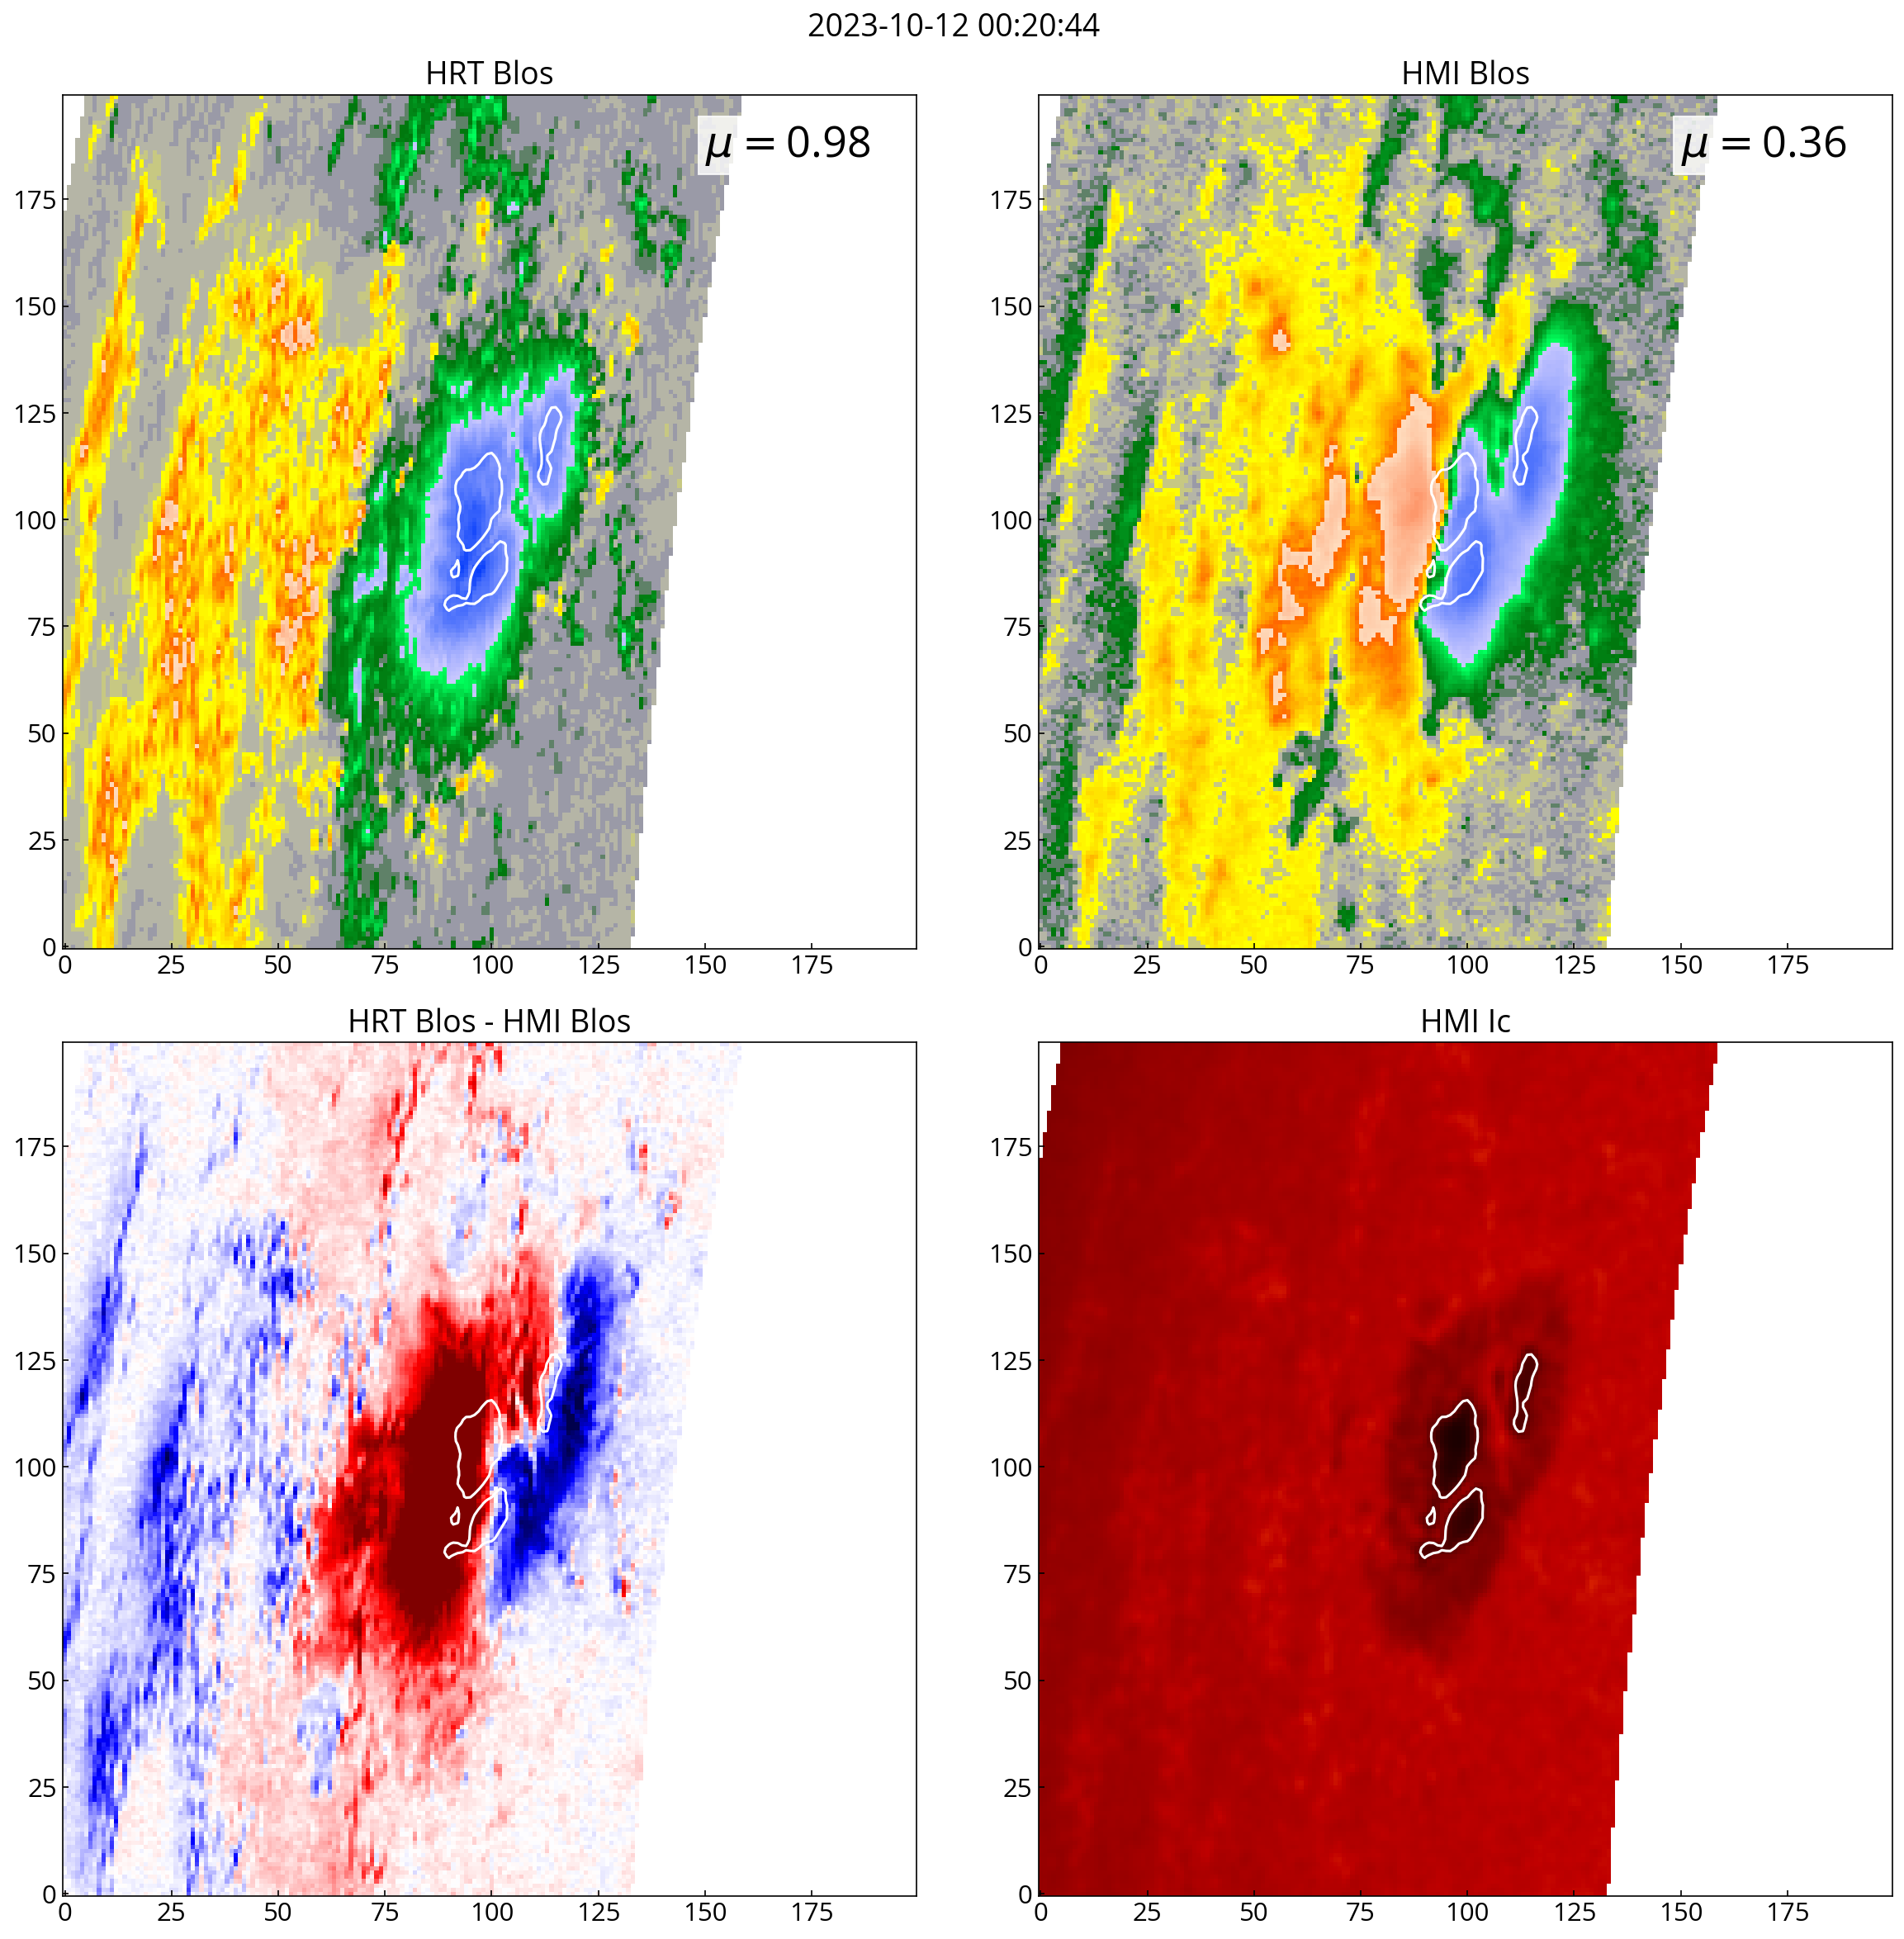

In [53]:
for i in range(1):
    
    tmp = hmi_ic_arr[...,i]
    fac = np.mean(tmp[~np.isnan(tmp)])
    level = 0.55*fac

    CS = plt.contour(hmi_ic_arr[:,:,i], levels = [level], colors = "white")

    p = CS.collections[0].get_paths()[0]
    v = p.vertices
    x = v[:,0]
    y = v[:,1]

    plt.close()

    #print(x)

    #print(y)

    bl_x=int(np.mean(x)-100)
    bl_y=int(np.mean(y)-100)
    
    tr_x=int(np.mean(x)+100)
    tr_y=int(np.mean(y)+100)

    #print(bl_x,bl_y)
    #print(tr_x,tr_y)

    tmp_hrt = hrt_arr
    
    fig=plt.figure(figsize=(16,16))
    fig.suptitle(times[i])
    plt.subplot(221)
    CS = plt.contour(hmi_ic_arr[bl_y:tr_y,bl_x:tr_x,i], levels = [level], colors = "white")    
    im=plt.imshow(tmp_hrt[bl_y:tr_y,bl_x:tr_x,i],origin="lower",cmap=magmap,vmin=-2000,vmax=2000)
    plt.title('HRT Blos')
    t = plt.text(150,185,r'$\mu=$'+f'{hrt_mus[i]:.2f}',fontsize=25)
    t.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white'))
    #plt.colorbar(im,fraction=0.046)
    
    plt.subplot(222)
    plt.title('HMI Blos')
    im2=plt.imshow(hmi_arr[bl_y:tr_y,bl_x:tr_x,i],origin="lower",cmap=magmap,vmin=-2000,vmax=2000)
    CS = plt.contour(hmi_ic_arr[bl_y:tr_y,bl_x:tr_x,i], levels = [level], colors = "white")
    t = plt.text(150,185,r'$\mu=$'+f'{hmi_mus[i]:.2f}',fontsize=25)
    t.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white'))
    #plt.colorbar(im2,fraction=0.046)
    
    plt.subplot(223)
    plt.title('HRT Blos - HMI Blos')
    im3=plt.imshow(tmp_hrt[bl_y:tr_y,bl_x:tr_x,i]-hmi_arr[bl_y:tr_y,bl_x:tr_x,i],origin="lower",cmap='seismic',vmin=-500,vmax=500)
    CS = plt.contour(hmi_ic_arr[bl_y:tr_y,bl_x:tr_x,i], levels = [level], colors = "white")
    #plt.colorbar(im3,fraction=0.046)
    
    plt.subplot(224)
    plt.title('HMI Ic')
    im4=plt.imshow(hmi_ic_arr[bl_y:tr_y,bl_x:tr_x,i],origin="lower",cmap='gist_heat',vmin=0,vmax=1.4)
    CS = plt.contour(hmi_ic_arr[bl_y:tr_y,bl_x:tr_x,i], levels = [level], colors = "white")
    #plt.colorbar(im4,fraction=0.046)
    
    plt.tight_layout()
    if i < 10:
        num='00'+str(i)
    elif i < 100:
        num='0'+str(i)
    else:
        num=str(i)
    #plt.show()
    plt.savefig(f'../movie_pngs/first_ar_sunspot_fov_{num}.png',transparent=False,facecolor='white')
    plt.close()

In [37]:
# # filepaths
# fp_in = "../movie_pngs/first_ar_sunspot_fov_*.png"
# fp_out = "../movie_pngs/first_ar_sunspot_fov.gif"

# # use exit stack to automatically close opened images
# with contextlib.ExitStack() as stack:

#     # lazily load images
#     imgs = (stack.enter_context(Image.open(f))
#             for f in sorted(glob.glob(fp_in)))

#     # extract  first image from iterator
#     img = next(imgs)

#     # https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
#     img.save(fp=fp_out, format='GIF', append_images=imgs,
#              save_all=True, duration=200, loop=0)

/tmp/ipykernel_115927/1575507415.py:9: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  p = CS.collections[0].get_paths()[0]


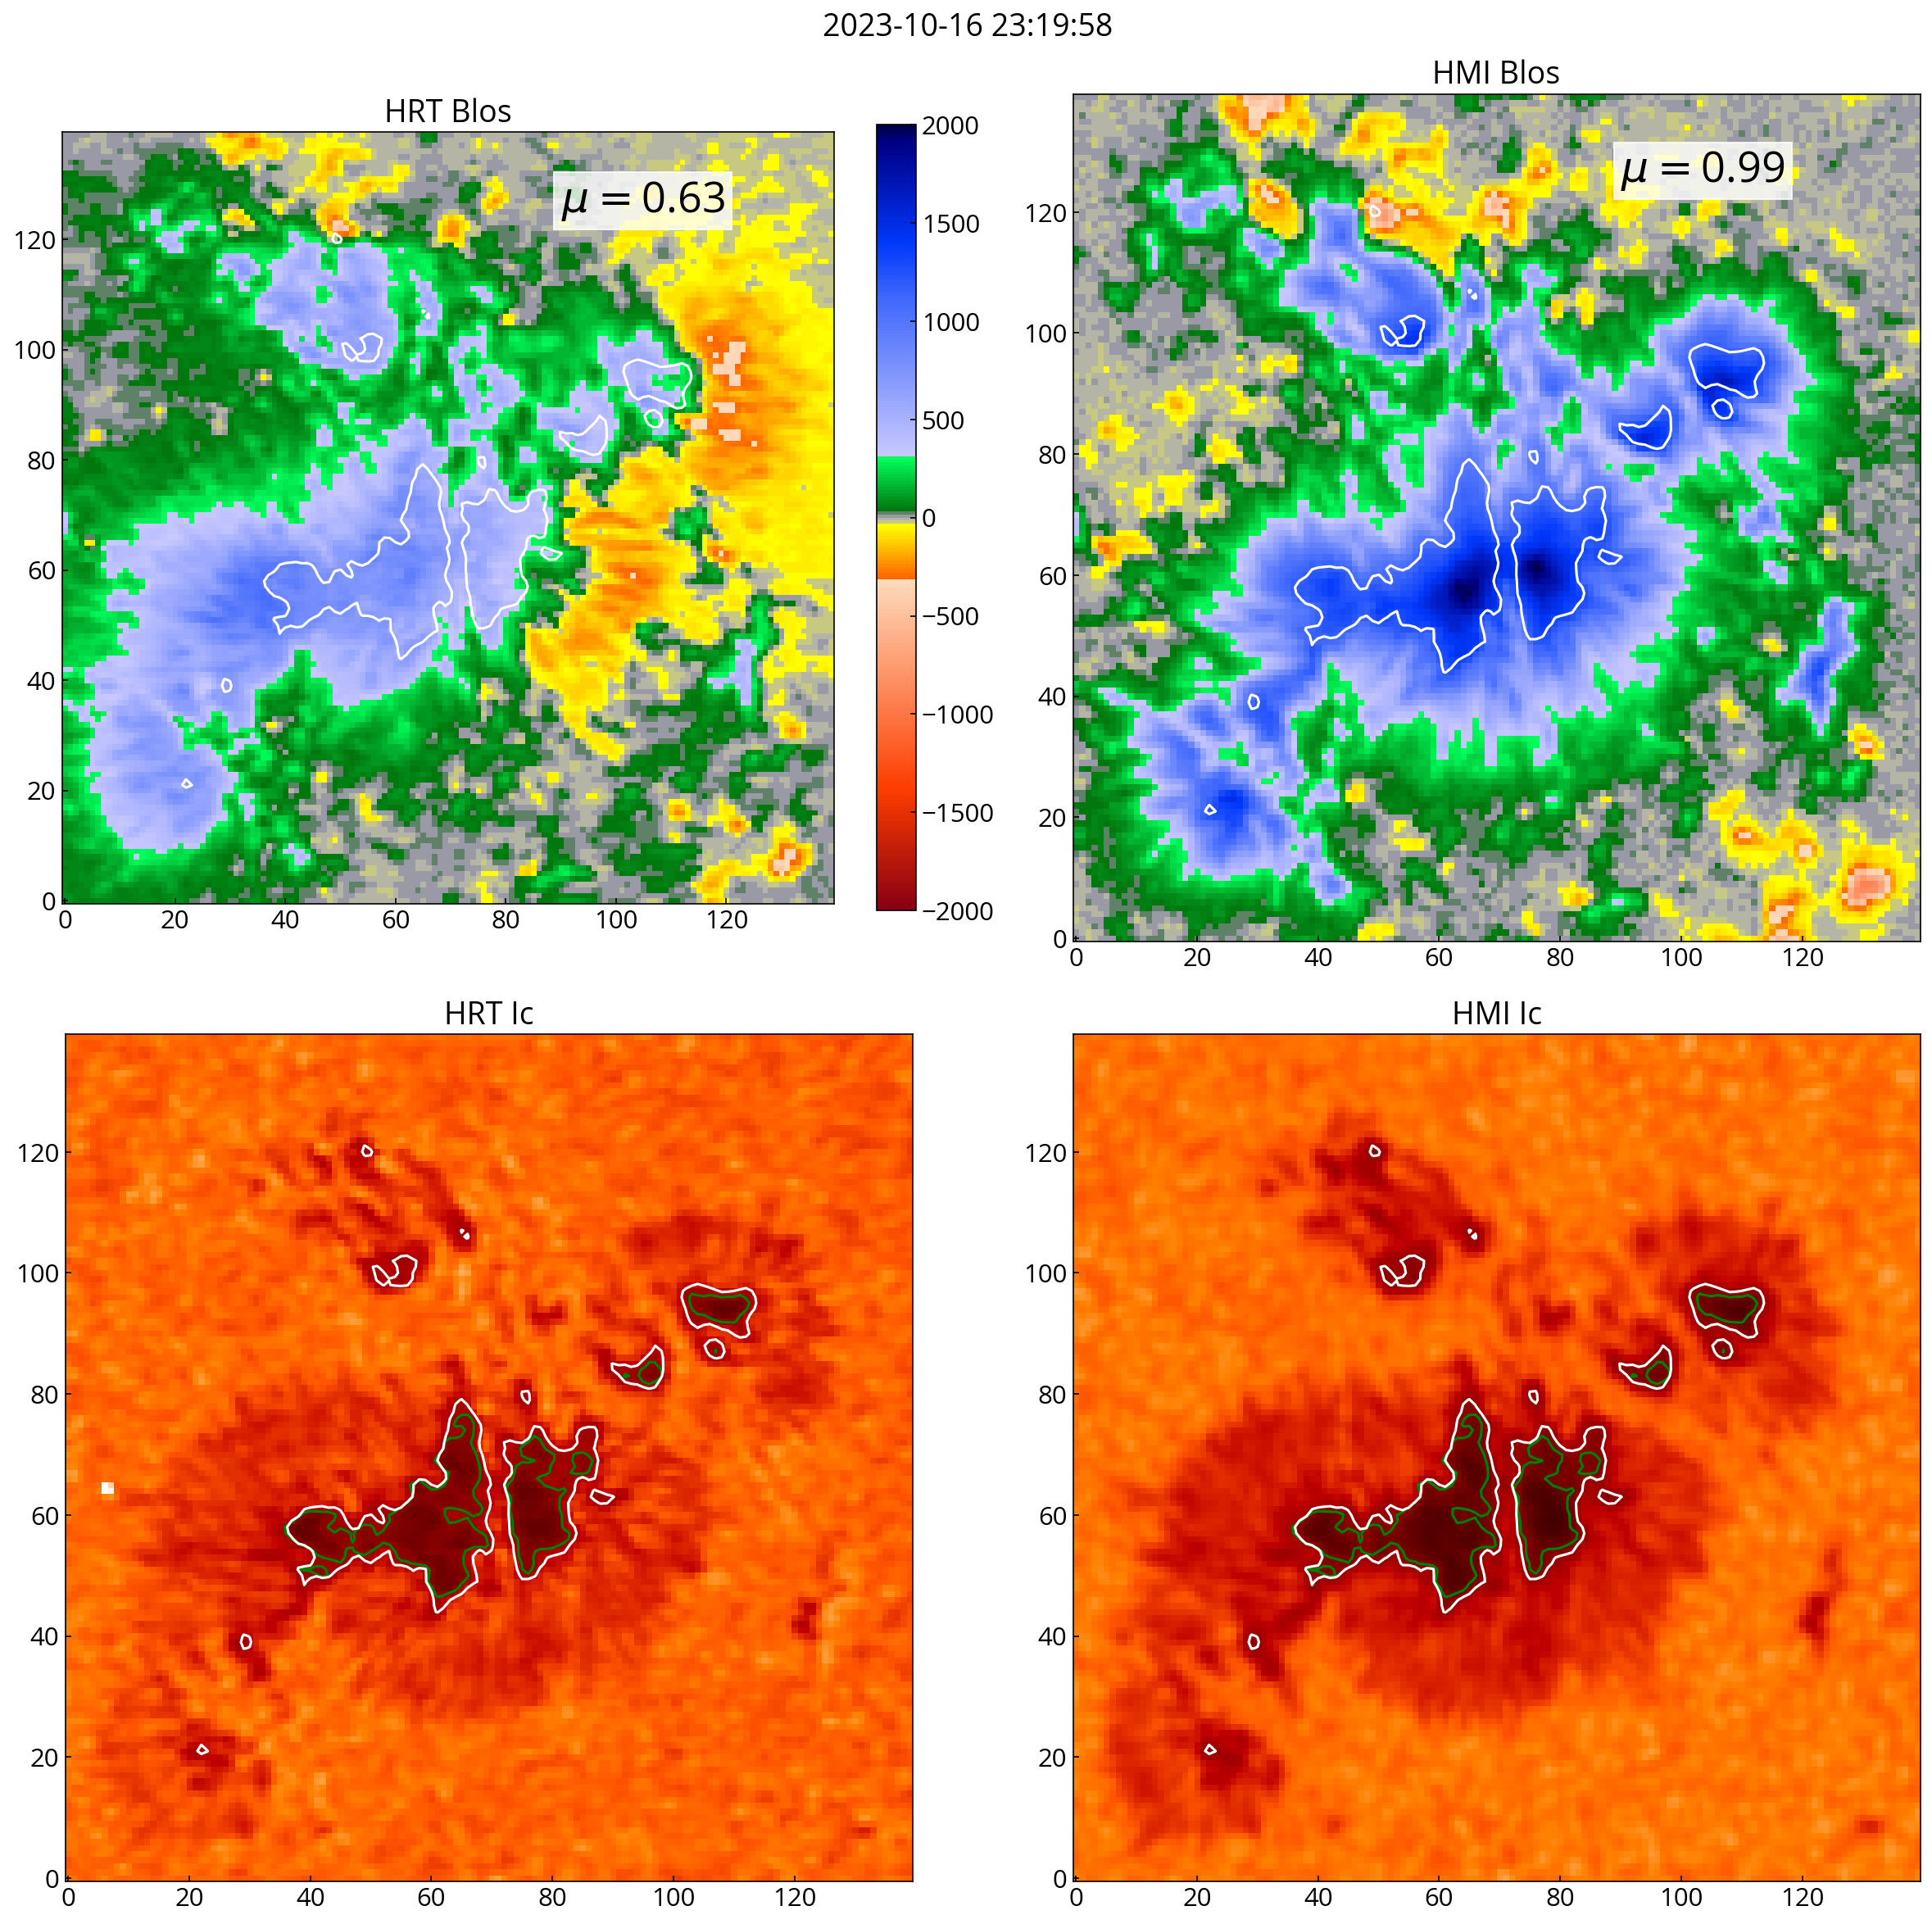

In [10]:
for i in range(116,117):
    
    tmp = hmi_ic_arr[...,i]
    fac = np.mean(tmp[~np.isnan(tmp)])
    level = 0.55*fac

    CS = plt.contour(hmi_ic_arr[:,:,i], levels = [level], colors = "white")

    p = CS.collections[0].get_paths()[0]
    v = p.vertices
    x = v[:,0]
    y = v[:,1]

    plt.close()

    #print(x)

    #print(y)

    bl_x=int(np.mean(x)-70)
    bl_y=int(np.mean(y)-70)
    
    tr_x=int(np.mean(x)+70)
    tr_y=int(np.mean(y)+70)

    #print(bl_x,bl_y)
    #print(tr_x,tr_y)

    tmp_hrt = np.roll(hrt_arr,-3,axis=1)
    tmp_hrt_icnt = np.roll(hrt_ic_arr,-3,axis=1)
    
    fig=plt.figure(figsize=(16,16))
    fig.suptitle(times[i])
    plt.subplot(221)
    CS = plt.contour(hmi_ic_arr[bl_y:tr_y,bl_x:tr_x,i], levels = [level], colors = "white")    
    im=plt.imshow(tmp_hrt[bl_y:tr_y,bl_x:tr_x,i],origin="lower",cmap=magmap,vmin=-2000,vmax=2000)
    plt.title('HRT Blos')
    t = plt.text(90,125,r'$\mu=$'+f'{hrt_mus[i]:.2f}',fontsize=25)
    t.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.colorbar(im,fraction=0.046)
    
    plt.subplot(222)
    plt.title('HMI Blos')
    im2=plt.imshow(hmi_arr[bl_y:tr_y,bl_x:tr_x,i],origin="lower",cmap=magmap,vmin=-2000,vmax=2000)
    CS = plt.contour(hmi_ic_arr[bl_y:tr_y,bl_x:tr_x,i], levels = [level], colors = "white")
    t = plt.text(90,125,r'$\mu=$'+f'{hmi_mus[i]:.2f}',fontsize=25)
    t.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='white'))
    #plt.colorbar(im2,fraction=0.046)
    
    plt.subplot(223)
    plt.title('HRT Ic')
    im3=plt.imshow(tmp_hrt_icnt[bl_y:tr_y,bl_x:tr_x,i],origin="lower",cmap='gist_heat',vmin=0,vmax=1.4)
    CS = plt.contour(tmp_hrt_icnt[bl_y:tr_y,bl_x:tr_x,i], levels = [0.55], colors = "green")
    CS = plt.contour(hmi_ic_arr[bl_y:tr_y,bl_x:tr_x,i], levels = [level], colors = "white")
    #plt.colorbar(im3,fraction=0.046)
    
    plt.subplot(224)
    plt.title('HMI Ic')
    im4=plt.imshow(hmi_ic_arr[bl_y:tr_y,bl_x:tr_x,i],origin="lower",cmap='gist_heat',vmin=0,vmax=1.4)
    CS = plt.contour(tmp_hrt_icnt[bl_y:tr_y,bl_x:tr_x,i], levels = [0.55], colors = "green")
    CS = plt.contour(hmi_ic_arr[bl_y:tr_y,bl_x:tr_x,i], levels = [level], colors = "white")
    #plt.colorbar(im4,fraction=0.046)
    
    plt.tight_layout()
    if i < 10:
        num='00'+str(i)
    elif i < 100:
        num='0'+str(i)
    else:
        num=str(i)
    plt.show()
    #plt.savefig(f'../movie_pngs/first_ar_sunspot_fov_icnt_{num}.png',transparent=False,facecolor='white')
    #plt.close()

In [62]:
# # filepaths
# fp_in = "../movie_pngs/first_ar_sunspot_fov_icnt_*.png"
# fp_out = "../movie_pngs/first_ar_sunspot_fov_icnt.gif"

# # use exit stack to automatically close opened images
# with contextlib.ExitStack() as stack:

#     # lazily load images
#     imgs = (stack.enter_context(Image.open(f))
#             for f in sorted(glob.glob(fp_in)))

#     # extract  first image from iterator
#     img = next(imgs)

#     # https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
#     img.save(fp=fp_out, format='GIF', append_images=imgs,
#              save_all=True, duration=200, loop=0)